In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
dataset = pd.read_csv("ADVANCE_HOUSE.csv")
pd.set_option("display.max_columns",None)     #maked as comment for a while
print(dataset.shape)
print(dataset.head())

(1460, 81)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            

FINDING NULL VALUE

In [7]:
feature_with_null = [x for x in dataset.columns if dataset[x].isnull().sum()>1]
print(feature_with_null)
for x in feature_with_null:
    print(x,np.round(dataset[x].isnull().sum() * 100 / len(dataset[x]),3), '%missing value')

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
LotFrontage 17.74 %missing value
Alley 93.767 %missing value
MasVnrType 59.726 %missing value
MasVnrArea 0.548 %missing value
BsmtQual 2.534 %missing value
BsmtCond 2.534 %missing value
BsmtExposure 2.603 %missing value
BsmtFinType1 2.534 %missing value
BsmtFinType2 2.603 %missing value
FireplaceQu 47.26 %missing value
GarageType 5.548 %missing value
GarageYrBlt 5.548 %missing value
GarageFinish 5.548 %missing value
GarageQual 5.548 %missing value
GarageCond 5.548 %missing value
PoolQC 99.521 %missing value
Fence 80.753 %missing value
MiscFeature 96.301 %missing value


In [8]:
#UNDERSTANDING RELATION BETWEEN NULL AND OUTPUT
data = dataset.copy()

In [9]:
#TRANSFORMING NULL VALUE
data[x] = np.where(data[x].isnull(),1,0)    #CHANGES NULL TO ZERO ELSEWHERE 1

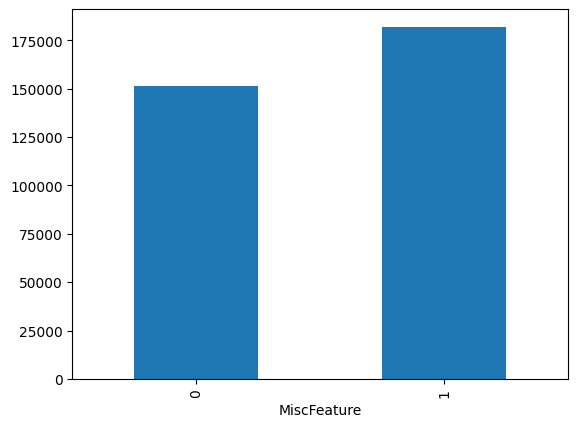

In [10]:
#MEAN SALES PRICE VS NULL VALUES
data.groupby(x)['SalePrice'].mean().plot.bar()
plt.show()                                            #HERE WE HAVE SEEN SALES PRICE IS INCREASED WITH MISSING VALUE ,SO CANNOT DROP NULL FEATURES

In [11]:
#SEPARATING NUMERICAL AND CATEGORICAL FEATURE
numeric_feature = [x for x in dataset.columns if dataset[x].dtype!='O']
print(len(numeric_feature),"are numerical features")

38 are numerical features


['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


<Axes: xlabel='YrSold'>

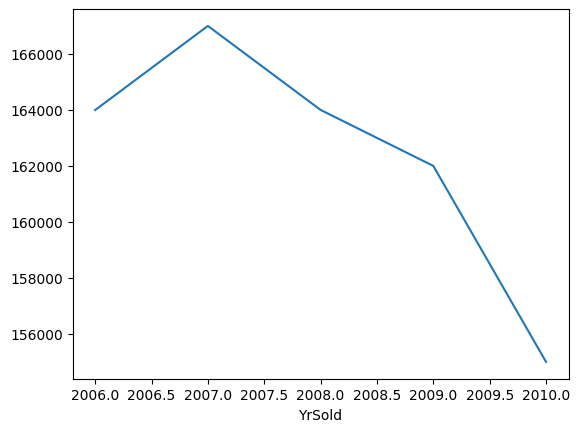

In [12]:
#HANDELING YEAR FEATURE
year_feature = [ x for x in numeric_feature if 'Yr' in x or 'Year' in x]
print(year_feature)
#YEAR VS SALES PRICE
dataset.groupby('YrSold')['SalePrice'].median().plot()

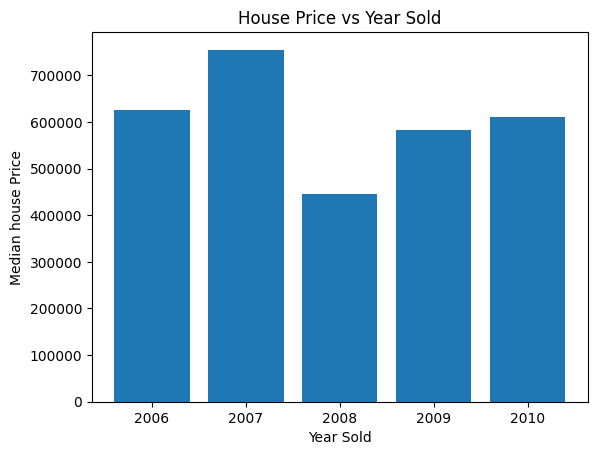

In [23]:
plt.xlabel('Year Sold')
plt.ylabel('Median house Price')
plt.title("House Price vs Year Sold")

# Access the YrSold and SalePrice columns from the dataset DataFrame
plt.bar(dataset['YrSold'],dataset['SalePrice'])

plt.show() # this will display the plot

17


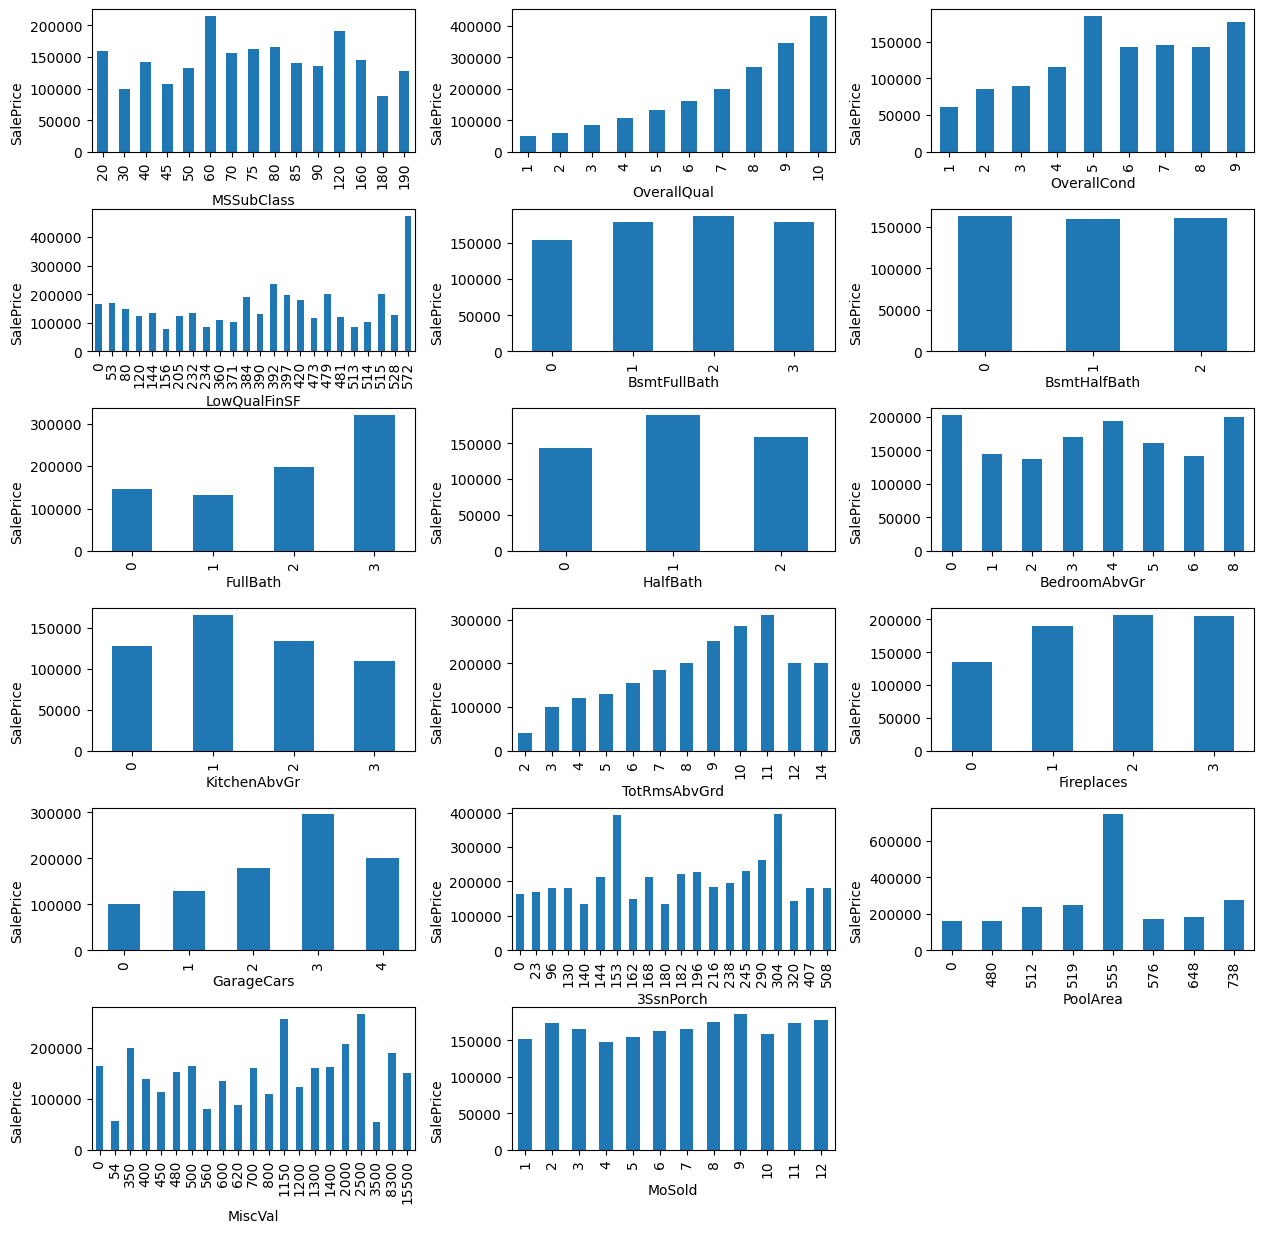

In [30]:
#DISTINGUISH BETWEEN DESCRETE AND CONTINUOUS VARIABLE
des_variable = [x for x in numeric_feature if len(dataset[x].unique()) < 25 and x not in year_feature]
print(len(des_variable))

# Create a figure with a grid of subplots
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(15, 20))  # Adjust figsize as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(des_variable):
    data = dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar(ax=axes[i])
    axes[i].set_xlabel(feature)  # Set the x-axis label to the feature name
    axes[i].set_ylabel('SalePrice', ha='right')  # Set the y-axis label with right alignment

# Turn off unused subplots if there are more subplots than features
for j in range(len(des_variable), len(axes)):
    fig.delaxes(axes[j])

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust horizontal and vertical spacing as needed

plt.show()


16


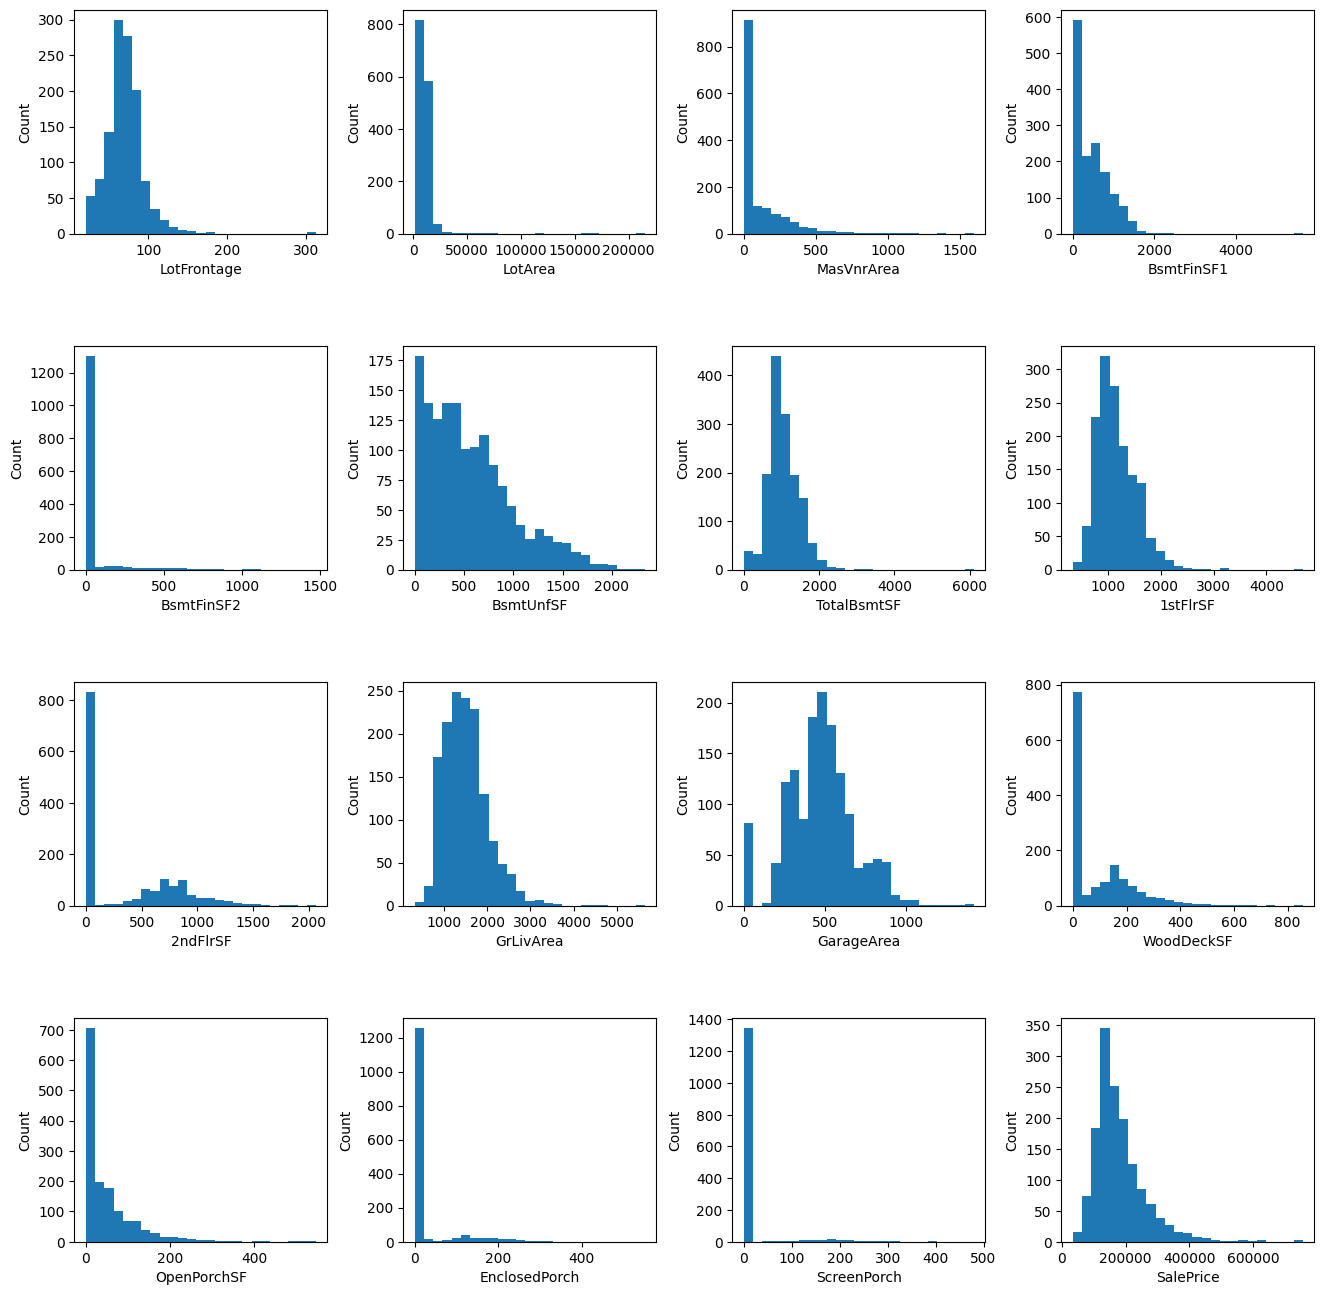

In [31]:
#continuos variables
cont_features = [x for x in numeric_feature if x not in des_variable + year_feature + ['Id']]
print(len(cont_features))

# Create a figure with a grid of subplots
num_plots = len(cont_features)
nrows = (num_plots + 3) // 4  # Calculate number of rows needed
fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(16, 4 * nrows))  # Adjust figsize as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(cont_features):
    axes[i].hist(dataset[feature], bins=25)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Count")

# Turn off unused subplots if there are more subplots than features
for j in range(len(cont_features), len(axes)):
    fig.delaxes(axes[j])

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust vertical and horizontal spacing as needed

plt.show()

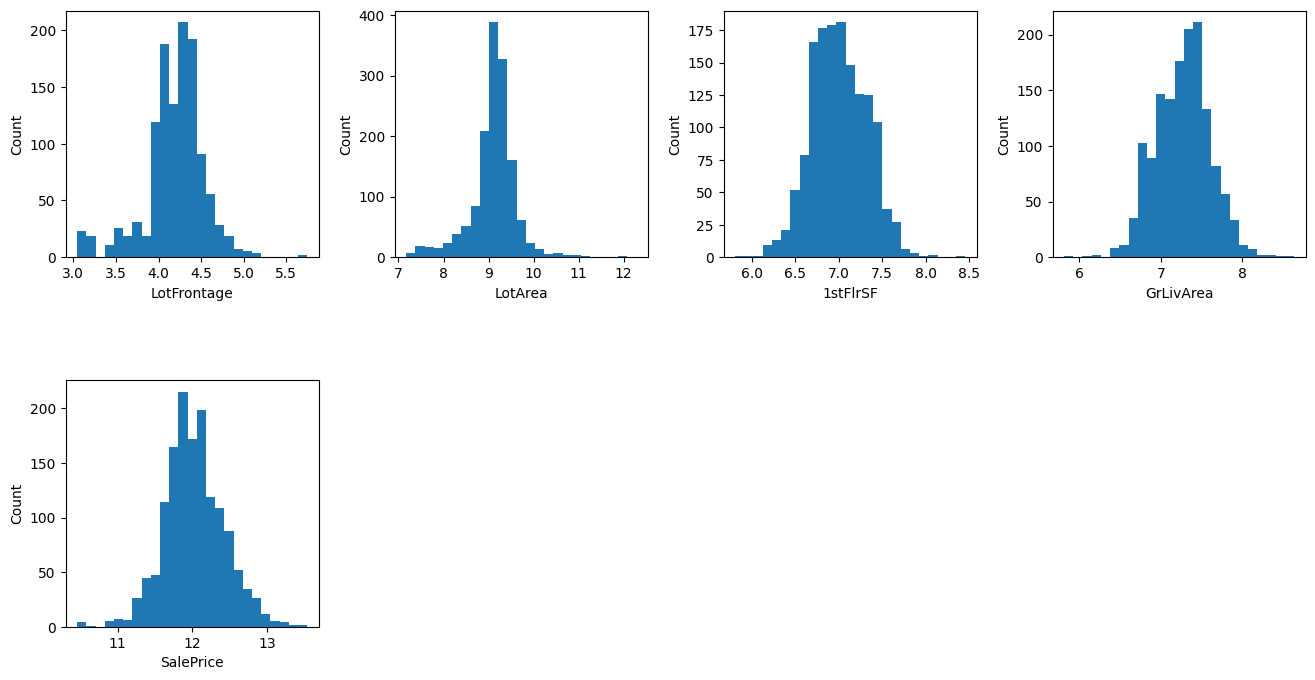

In [34]:
#log transformation to our skewd data
data = dataset.copy()

# Filter out features with zeros and negative values
filtered_features = [x for x in cont_features if 0 not in data[x].unique() and data[x].min() > 0]

# Set up the figure and axes
num_plots = len(filtered_features)
nrows = (num_plots + 3) // 4  # Calculate number of rows needed
fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(16, 4 * nrows))  # Adjust figsize as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(filtered_features):
    # Apply log transformation
    data[feature] = np.log(data[feature])

    # Plot histogram
    axes[i].hist(data[feature], bins=25)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

# Turn off unused subplots if there are more subplots than features
for j in range(len(filtered_features), len(axes)):
    fig.delaxes(axes[j])

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust vertical and horizontal spacing as needed

plt.show()

CHECKING FOR OUTLIERS

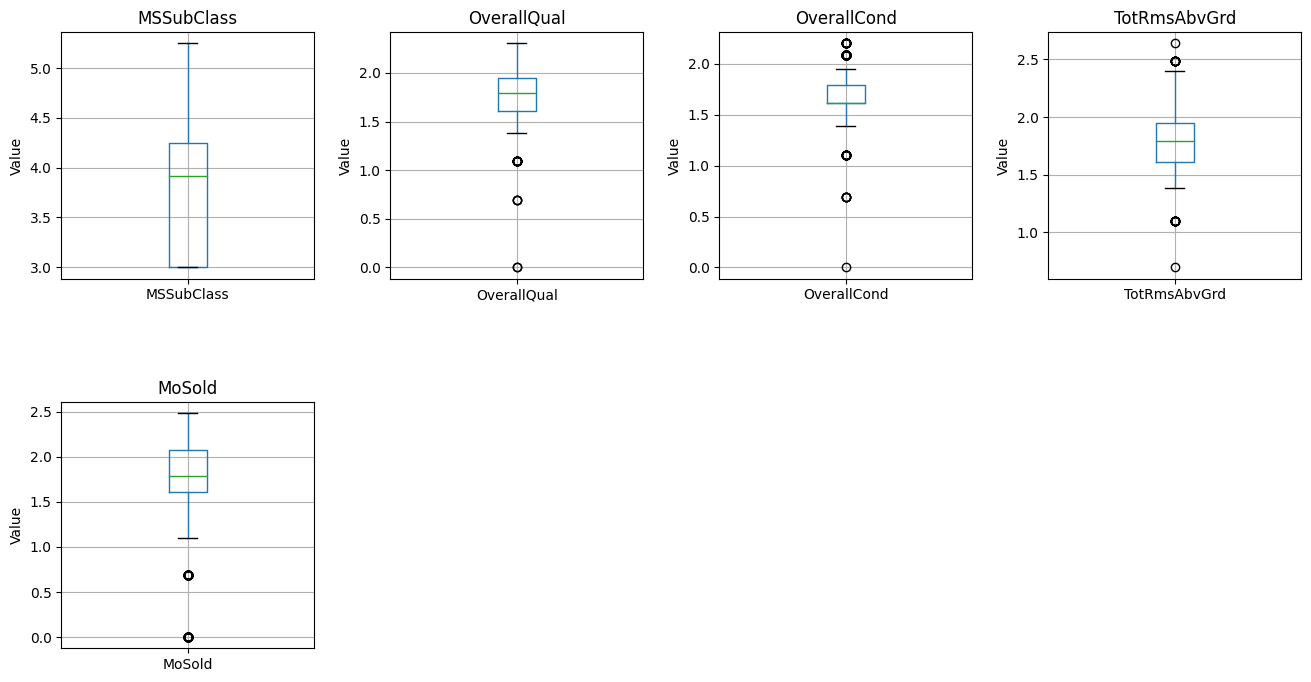

In [35]:
data = dataset.copy()

# Filter out features with zeros
filtered_features = [x for x in des_variable if 0 not in data[x].unique()]

# Set up the figure and axes
num_plots = len(filtered_features)
nrows = (num_plots + 3) // 4  # Calculate number of rows needed
fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(16, 4 * nrows))  # Adjust figsize as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(filtered_features):
    # Apply log transformation
    data[feature] = np.log(data[feature])

    # Plot boxplot
    data.boxplot(column=feature, ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_ylabel('Value')

# Turn off unused subplots if there are more subplots than features
for j in range(len(filtered_features), len(axes)):
    fig.delaxes(axes[j])

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust vertical and horizontal spacing as needed

plt.show()

In [18]:
cat_feature = [x for x in dataset.columns if data[x].dtype == 'O']
print(len(cat_feature))
print(dataset[cat_feature].head())

43
  MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterC

In [19]:
for x in cat_feature:
    n =data[x].nunique(x)
    print("Number of unique elements in " + x,n)  #NUMBER oF UNIQUE ELEMENT IN A COLUMN

Number of unique elements in MSZoning 5
Number of unique elements in Street 2
Number of unique elements in Alley 2
Number of unique elements in LotShape 4
Number of unique elements in LandContour 4
Number of unique elements in Utilities 2
Number of unique elements in LotConfig 5
Number of unique elements in LandSlope 3
Number of unique elements in Neighborhood 25
Number of unique elements in Condition1 9
Number of unique elements in Condition2 8
Number of unique elements in BldgType 5
Number of unique elements in HouseStyle 8
Number of unique elements in RoofStyle 6
Number of unique elements in RoofMatl 8
Number of unique elements in Exterior1st 15
Number of unique elements in Exterior2nd 16
Number of unique elements in MasVnrType 3
Number of unique elements in ExterQual 4
Number of unique elements in ExterCond 5
Number of unique elements in Foundation 6
Number of unique elements in BsmtQual 4
Number of unique elements in BsmtCond 4
Number of unique elements in BsmtExposure 4
Number of

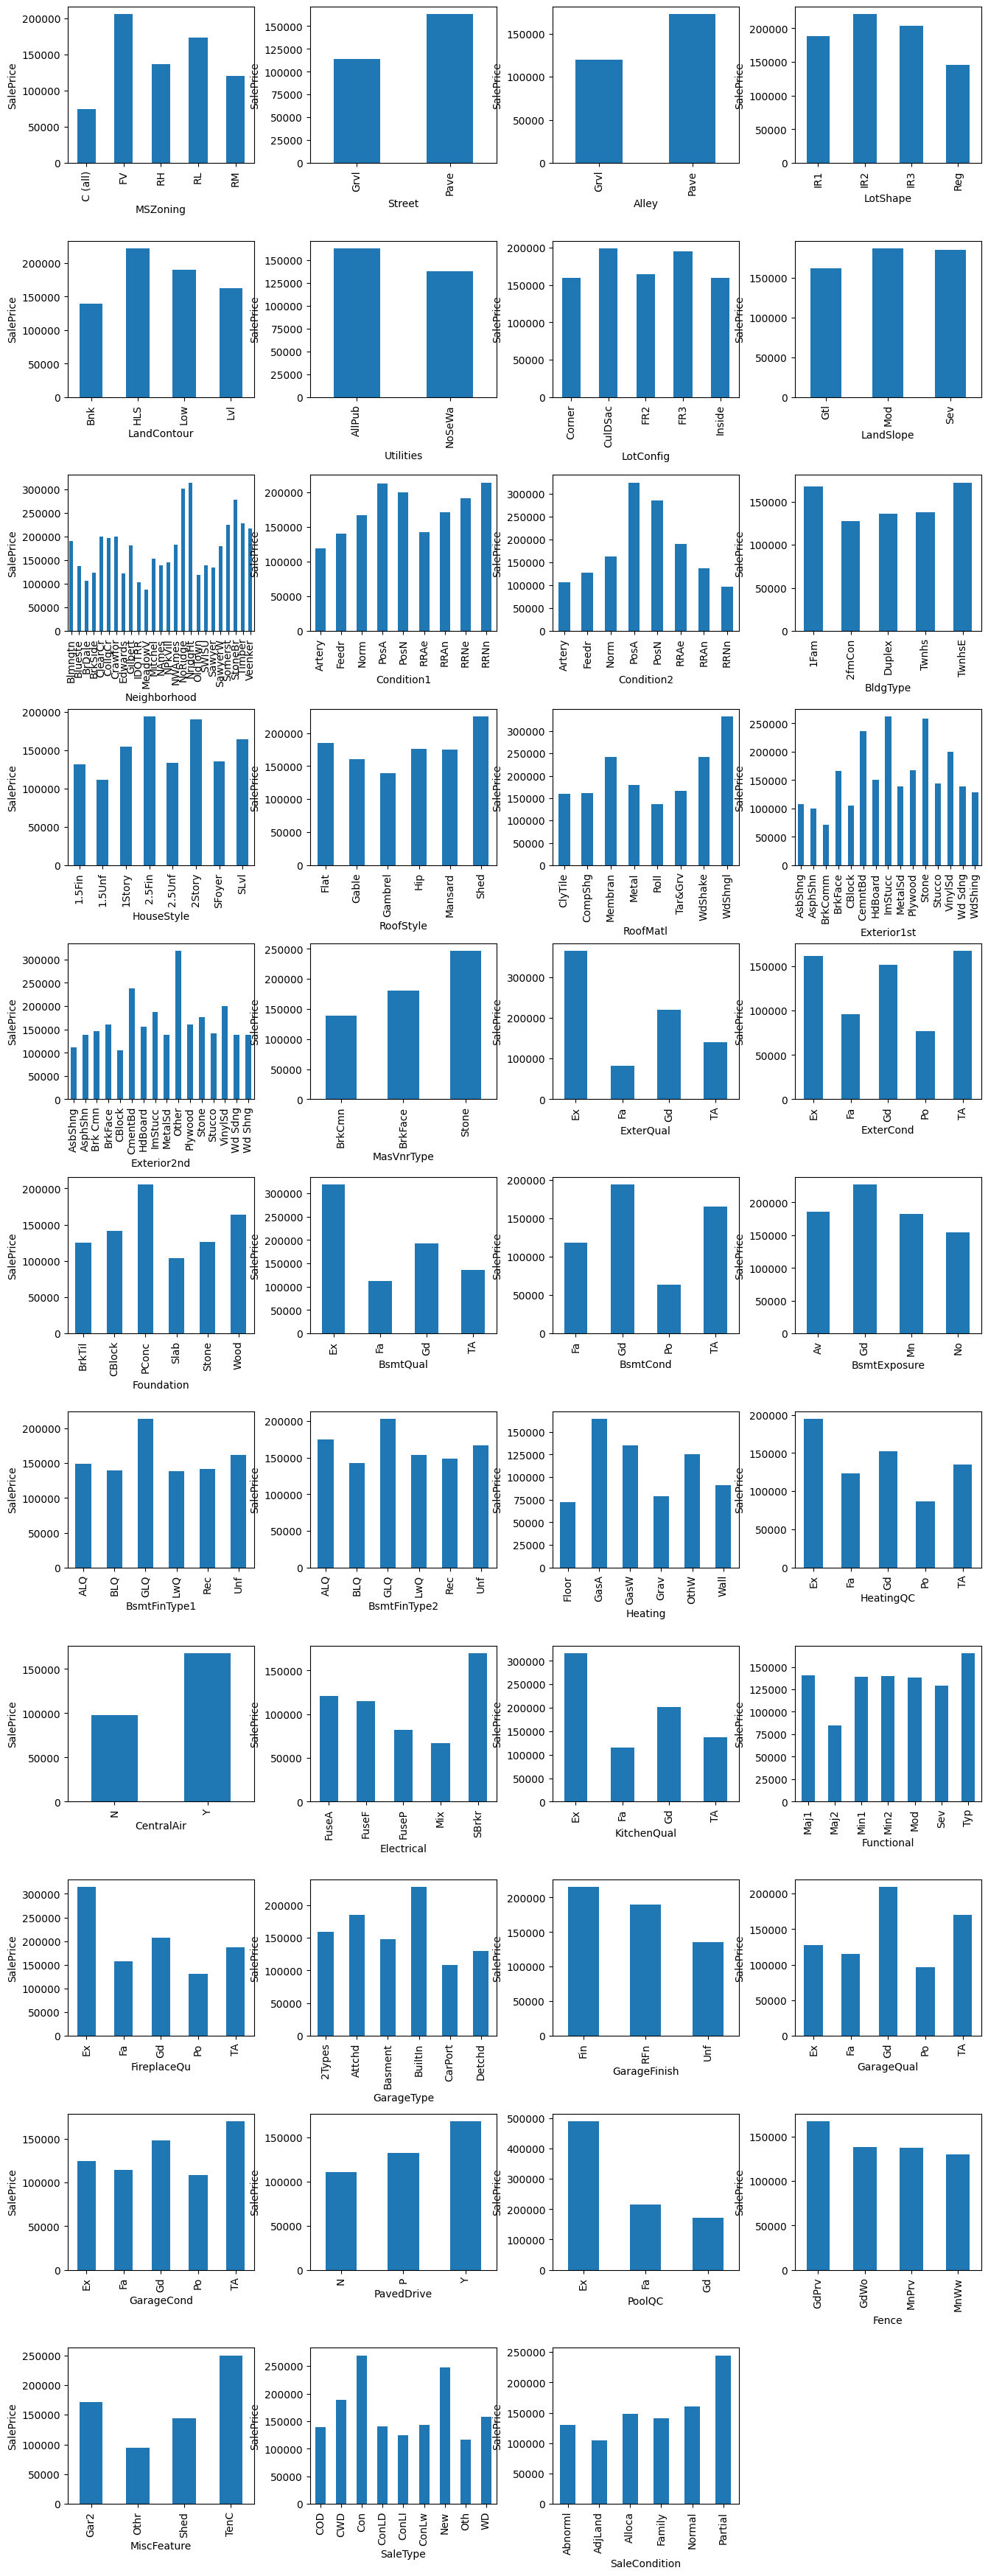

In [36]:
#CATEGORICAL FEATURE AND SALES PRICE RELATIONSHIP
num_plots = len(cat_feature)
nrows = (num_plots + 3) // 4  # Calculate the number of rows needed
fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(16, 4 * nrows))  # Adjust figsize as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(cat_feature):
    data = dataset.copy()
    # Group by the categorical feature and calculate the median SalePrice
    data.groupby(feature)['SalePrice'].median().plot.bar(ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('SalePrice')

# Turn off unused subplots if there are more subplots than features
for j in range(len(cat_feature), len(axes)):
    fig.delaxes(axes[j])

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust vertical and horizontal spacing as needed

plt.show()

In [21]:
plt.show()